In [ ]:
from spacepy import pycdf
import cdflib
import matplotlib.pyplot as plt
import math
from mpl_toolkits.mplot3d import axes3d, Axes3D
import numpy as np
#dmsp-f16_ssm_magnetometer_20130601_v1.0.4.cdf
![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/lkilcommons/OvationPyme/HEAD?labpath=notebooks%2FInteractiveWithHemisphericPower.ipynb)


In [ ]:

archivo = cdflib.CDF('dmsp-f16_ssjs_precipitating-electrons-ions_20130531000000_20130531230000_cdaweb.cdf')
info = archivo.cdf_info()

print(info)
#print(list(archivo.keys()))
#extraer datos específicos
tiempo = archivo.varget('Epoch')
total_i_flux = archivo.varget('ION_TOTAL_ENERGY_FLUX')
N1=100
N2=300
#print((total_i_flux)[N1:N2])
log_i_flux=[]
I=N1
for elem in total_i_flux:
    if I <= N2:
        if elem > 0:
            log_i_flux.append(math.log10(elem))
            I+=1
       
        else:
            log_i_flux.append(elem)
            I+=1
#print(log_i_flux)
#print('Tiempo (Epoch):', tiempo[:10])
#print('Campo magnético (B_SC_OBS_ORIG):', campo_mag[:10])

#necesario para que sea legible
tiempo_final = cdflib.cdfepoch.to_datetime(tiempo)

plt.figure(figsize=(10, 6))
plt.scatter(tiempo_final[N1:N2+1],log_i_flux)
plt.xlabel('Tiempo')
plt.ylabel('Ion flux')
plt.title('Ion total flux vs Tiempo')
plt.grid(True)
plt.show()
# Carga el archivo CDF
archivo_cdf = "ruta/del/archivo.cdf"


# Obtener la información del archivo
info = cdf.cdf_info()

# Acceder directamente a las propiedades del objeto CDFInfo
r_variables = info.rVariables  # Variables de registro
z_variables = info.zVariables  # Variables no de registro

# Listar todas las variables
print("Etiquetas (Labels) del archivo CDF:")
for var in r_variables + z_variables:
    print(var)
for var in z_variables:
    # Obtener los atributos de la variable
    atributos = cdf.varattsget(var)
    
    # Verificar si existe el atributo de unidades
    unidades = atributos.get('UNITS', 'Sin unidades definidas')
    
    print(f"Variable: {var}, Unidades: {unidades}")

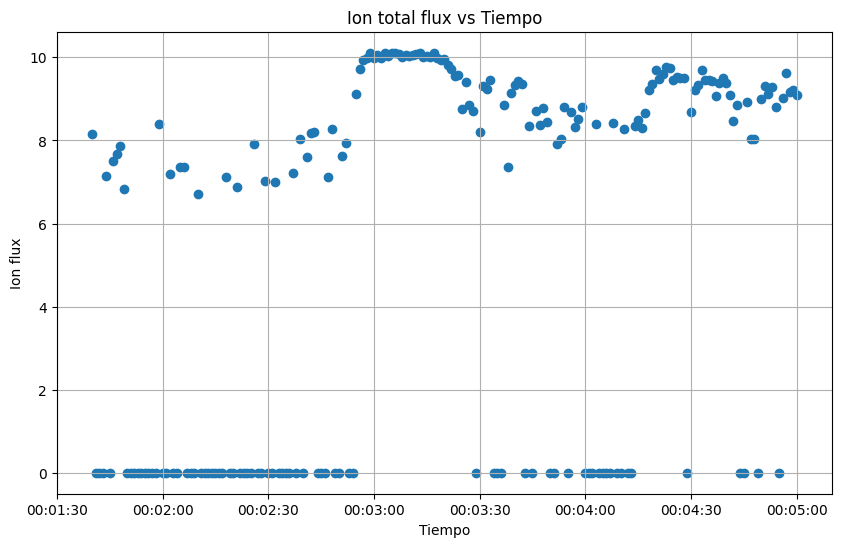

NameError: name 'cdf' is not defined

In [19]:
tiempo = archivo.varget('Epoch')
total_i_flux = archivo.varget('ION_TOTAL_ENERGY_FLUX')
N1=100
N2=300
#print((total_i_flux)[N1:N2])
log_i_flux=[]
I=N1
for elem in total_i_flux:
    if I <= N2:
        if elem > 0:
            log_i_flux.append(math.log10(elem))
            I+=1
       
        else:
            log_i_flux.append(elem)
            I+=1
#print(log_i_flux)
#print('Tiempo (Epoch):', tiempo[:10])
#print('Campo magnético (B_SC_OBS_ORIG):', campo_mag[:10])

#necesario para que sea legible
tiempo_final = cdflib.cdfepoch.to_datetime(tiempo)

plt.figure(figsize=(10, 6))
plt.scatter(tiempo_final[N1:N2+1],log_i_flux)
plt.xlabel('Tiempo')
plt.ylabel('Ion flux')
plt.title('Ion total flux vs Tiempo')
plt.grid(True)
plt.show()
# Carga el archivo CDF
archivo_cdf = "ruta/del/archivo.cdf"


# Obtener la información del archivo
info = cdf.cdf_info()

# Acceder directamente a las propiedades del objeto CDFInfo
r_variables = info.rVariables  # Variables de registro
z_variables = info.zVariables  # Variables no de registro

# Listar todas las variables
print("Etiquetas (Labels) del archivo CDF:")
for var in r_variables + z_variables:
    print(var)
for var in z_variables:
    # Obtener los atributos de la variable
    atributos = cdf.varattsget(var)
    
    # Verificar si existe el atributo de unidades
    unidades = atributos.get('UNITS', 'Sin unidades definidas')
    
    print(f"Variable: {var}, Unidades: {unidades}")

In [21]:


# Carga del archivo CDF
archivo = cdflib.CDF('dmsp-f16_ssjs_precipitating-electrons-ions_20130531000000_20130531230000_cdaweb.cdf')

# Obtener las variables
latitud = archivo.varget('SC_GEOCENTRIC_LAT')  # Latitud en grados
longitud = archivo.varget('SC_GEOCENTRIC_LON')  # Longitud en grados
altitud = archivo.varget("SC_GEOCENTRIC_R")  # Radio geocéntrico en km

# Selección de rango de datos
N1, N2 = 100, 300

# Convertir latitud y longitud de grados a radianes
lat_rad = np.radians(latitud[N1:N2+1])
lon_rad = np.radians(longitud[N1:N2+1])
r = altitud[N1:N2+1]

# Conversión a coordenadas cartesianas
x = r * np.cos(lat_rad) * np.cos(lon_rad)
y = r * np.cos(lat_rad) * np.sin(lon_rad)
z = r * np.sin(lat_rad)

# Graficar la trayectoria en 3D
fig = plt.figure()
ax = fig.add_subplot(projection="3d")
ax.plot(x, y, z, label="Trayectoria 3D", marker="o")

# Etiquetas y leyenda
ax.set_xlabel("X (km)")
ax.set_ylabel("Y (km)")
ax.set_zlabel("Z (km)")
plt.legend()
plt.show()



ValueError: Unknown projection '3d'

<Figure size 640x480 with 0 Axes>

Borde de 2bi encontrado en el índice 1, tiempo: 2014-12-30T00:00:01.528000000


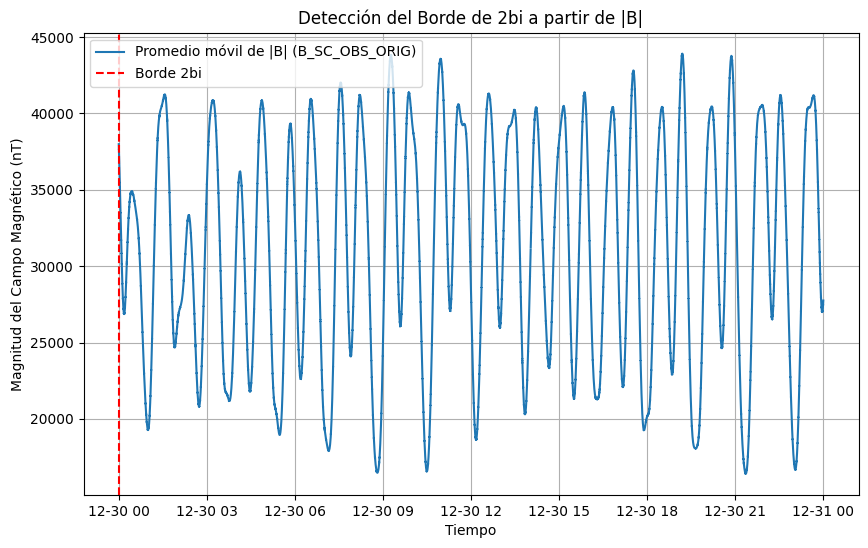

In [20]:


# Cargar el archivo CDF
cdf_file = cdflib.CDF('dmsp-f17_ssms_magnetometer_20141230000000_20141230235959_cdaweb.cdf')

# Extraer las componentes del campo magnético (x, y, z)
time_data = cdf_file.varget('Epoch')
b_field_data = cdf_file.varget('B_SC_OBS_ORIG')  # Suponemos que tiene la forma (N, 3)

# Convertir el tiempo a formato legible
epoch_dates = cdflib.cdfepoch.to_datetime(time_data)

# Calcular la magnitud del campo magnético
b_magnitude = np.linalg.norm(b_field_data, axis=1)

# Definir los parámetros del análisis de 2bi
sliding_avg_window = 2  # Ventana de promedio móvil (en segundos)
search_window = 10      # Ventana de búsqueda (en segundos)
threshold = 10.5        # Umbral mínimo para el máximo

# Calcular el promedio móvil sobre la magnitud del campo
sliding_avg_bmag = np.convolve(b_magnitude, np.ones(sliding_avg_window)/sliding_avg_window, mode='valid')

# Buscar el máximo en un intervalo poleward de 10 segundos
b2i_index = None
for i in range(len(sliding_avg_bmag) - search_window):
    # Tomar el valor promedio actual en la ventana de 2 segundos
    current_avg = sliding_avg_bmag[i]
    
    # Comparar con los siguientes 10 segundos
    future_flux = sliding_avg_bmag[i+1:i+search_window]
    if current_avg > np.max(future_flux) and current_avg >= threshold:
        b2i_index = i
        break
if b2i_index is not None:
    print(f"Borde de 2bi encontrado en el índice {b2i_index}, tiempo: {epoch_dates[b2i_index]}")
else:
    print("No se encontró un borde de 2bi que cumpla con el umbral.")

# Graficar la magnitud del campo magnético y marcar el borde de 2bi
plt.figure(figsize=(10, 6))
plt.plot(epoch_dates[:len(sliding_avg_bmag)], sliding_avg_bmag, label='Promedio móvil de |B| (B_SC_OBS_ORIG)')
if b2i_index is not None:
    plt.axvline(x=epoch_dates[b2i_index], color='red', linestyle='--', label='Borde 2bi')
plt.xlabel('Tiempo')
plt.ylabel('Magnitud del Campo Magnético (nT)')
plt.title('Detección del Borde de 2bi a partir de |B|')
plt.grid(True)
plt.legend()
plt.show()